In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
df1821 = pd.read_csv('https://raw.githubusercontent.com/JinmingChen12/Capstone/main/NBA2018-2021.txt',error_bad_lines=False)
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,6' 2'',6' 4'',8' 3'',217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,6' 3'',6' 4'',8' 1'',198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,6' 9'',6' 10'',9' 2'',194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,6' 10'',7' 0'',9' 4'',273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,6' 11'',7' 0'',9' 7'',225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20%,8.00,8.75,6'2'',6'3'',8'3'',185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80%,8.00,8.75,6'4'',6'5'',8'5'',214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80%,8.00,9.00,6'0'',6'1'',8'3'',194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40%,8.00,9.75,6'3'',6'4'',8'3'',204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [2]:
def feetinchtocm(feetinch):
    if feetinch != 'None':
        pattern = re.compile(r'[0-9]+')
        feetinch = re.findall(pattern, feetinch)
        return int(feetinch[0])*30.48+int(feetinch[1])*2.54
    else:
        return 'None'

In [3]:
df1821.height_wo_shoes = df1821.height_wo_shoes.apply(lambda x: feetinchtocm(x))
df1821.height_w_shoes = df1821.height_w_shoes.apply(lambda x: feetinchtocm(x))
df1821.standing_reach = df1821.standing_reach.apply(lambda x: feetinchtocm(x))
df1821.wingspan = df1821.wingspan.apply(lambda x: feetinchtocm(x))

In [4]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20%,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80%,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80%,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40%,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [5]:
df1821.isnull().sum()

Season                  0
player                  0
pos                     0
body_fat                0
hand_length             0
hand_width              0
height_wo_shoes         0
height_w_shoes          0
standing_reach          0
weight                  0
wingspan                0
age                     0
draft                   0
pick                   59
conference              0
conference_strength     0
points                  0
rebounds                0
assists                 0
steals                  0
FG%                     0
3p%                     1
dtype: int64

In [6]:
# delete % in body_fat
df1821["body_fat"] = df1821["body_fat"].str.replace("%", "")

In [7]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [8]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat                object
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

In [9]:
df1821["body_fat"] = pd.to_numeric(df1821["body_fat"])
df1821["FG%"] = pd.to_numeric(df1821["FG%"])

In [10]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df1821.describe()

,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,draft,pick,conference_strength,points,rebounds,assists,steals,FG%,3p%
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,125.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,183.000000
mean,6.465326,8.758152,9.448370,195.538587,198.810217,261.426739,211.444565,208.500870,20.559783,0.679348,33.488000,3.763587,8.648913,3.730435,1.547826,0.520196,0.447049,0.360087
std,2.274012,0.514743,0.688546,8.394779,8.427183,12.697133,23.655269,10.424791,1.190450,0.468001,16.167778,2.674476,4.965003,2.383286,1.303629,0.361896,0.089596,0.671871
min,0.000000,7.500000,7.750000,175.260000,177.800000,231.140000,167.800000,182.880000,19.000000,0.000000,4.000000,1.000000,0.500000,0.100000,0.000000,-0.400000,0.125000,0.000000
25%,5.000000,8.500000,9.000000,190.500000,193.040000,251.460000,194.800000,200.660000,20.000000,0.000000,20.000000,2.000000,4.000000,2.000000,0.600000,0.200000,0.400000,0.300000
50%,6.050000,8.750000,9.500000,195.580000,198.120000,261.620000,207.400000,208.280000,20.000000,1.000000,34.000000,3.000000,8.300000,3.300000,1.200000,0.425000,0.439000,0.333000
75%,7.600000,9.000000,10.000000,200.660000,203.835000,269.875000,225.650000,215.900000,21.000000,1.000000,48.000000,5.000000,12.300000,5.000000,2.100000,0.800000,0.489000,0.378000
max,15.800000,10.500000,11.000000,226.060000,231.140000,309.880000,303.000000,248.920000,23.000000,1.000000,59.000000,20.000000,24.200000,11.100000,8.900000,1.900000,0.746000,9.284000


In [11]:
#Find the number of unique values for each variable
df1821.nunique(axis=0)

Season                   3
player                 174
pos                     12
body_fat                95
hand_length             13
hand_width              14
height_wo_shoes         18
height_w_shoes          17
standing_reach          24
weight                 152
wingspan                21
age                      5
draft                    2
pick                    56
conference              11
conference_strength     12
points                 108
rebounds                71
assists                 49
steals                  25
FG%                    115
3p%                     99
dtype: int64

In [12]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat               float64
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

In [13]:
#Create lists of numerical and categorical attributes

col_cat=['Season', 'player', 'pos', 'draft', 'conference']

col_num=['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan', 'pick',
         'age','conference_strength','points','rebounds','assists','steals','FG%','3p%']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numerical attributes:%s" %len(col_num))

# of categorical attributes:5
# of numerical attributes:17


#### Histograms, Bar Charts, Boxplots and Correlation Matrix
#### Plot a histogram for each of our numerical attributes.

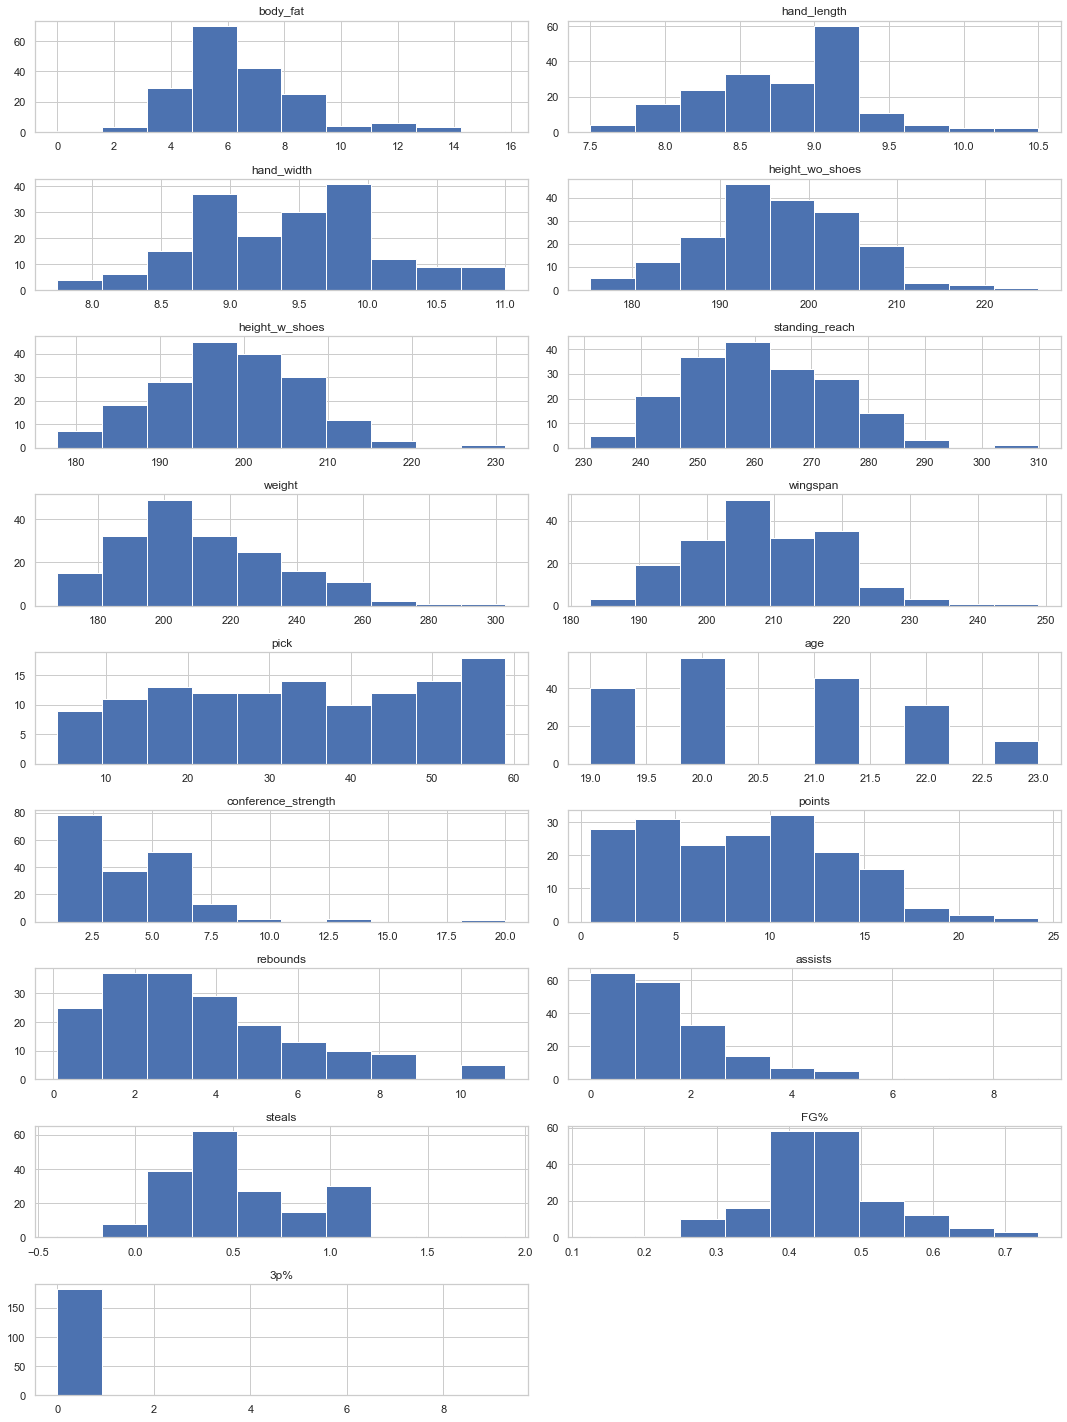

In [14]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,35)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(16,2,j) 
    plt.hist(df1821[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

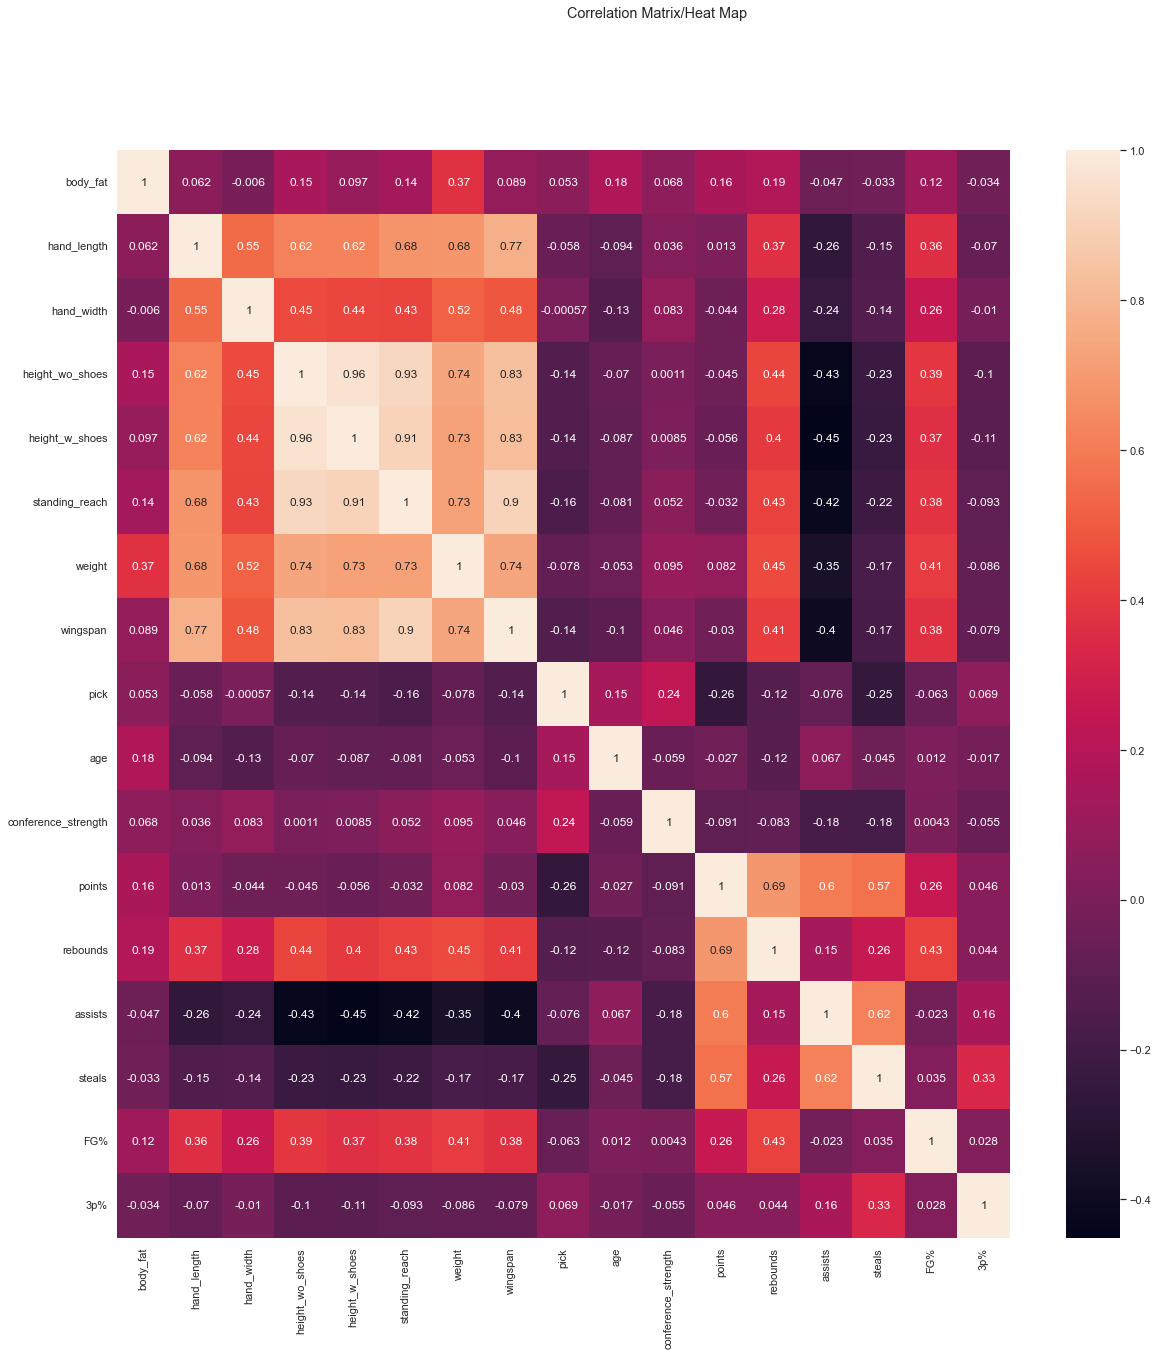

In [15]:
#Graph heat map for correlation
corr_num=df1821[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

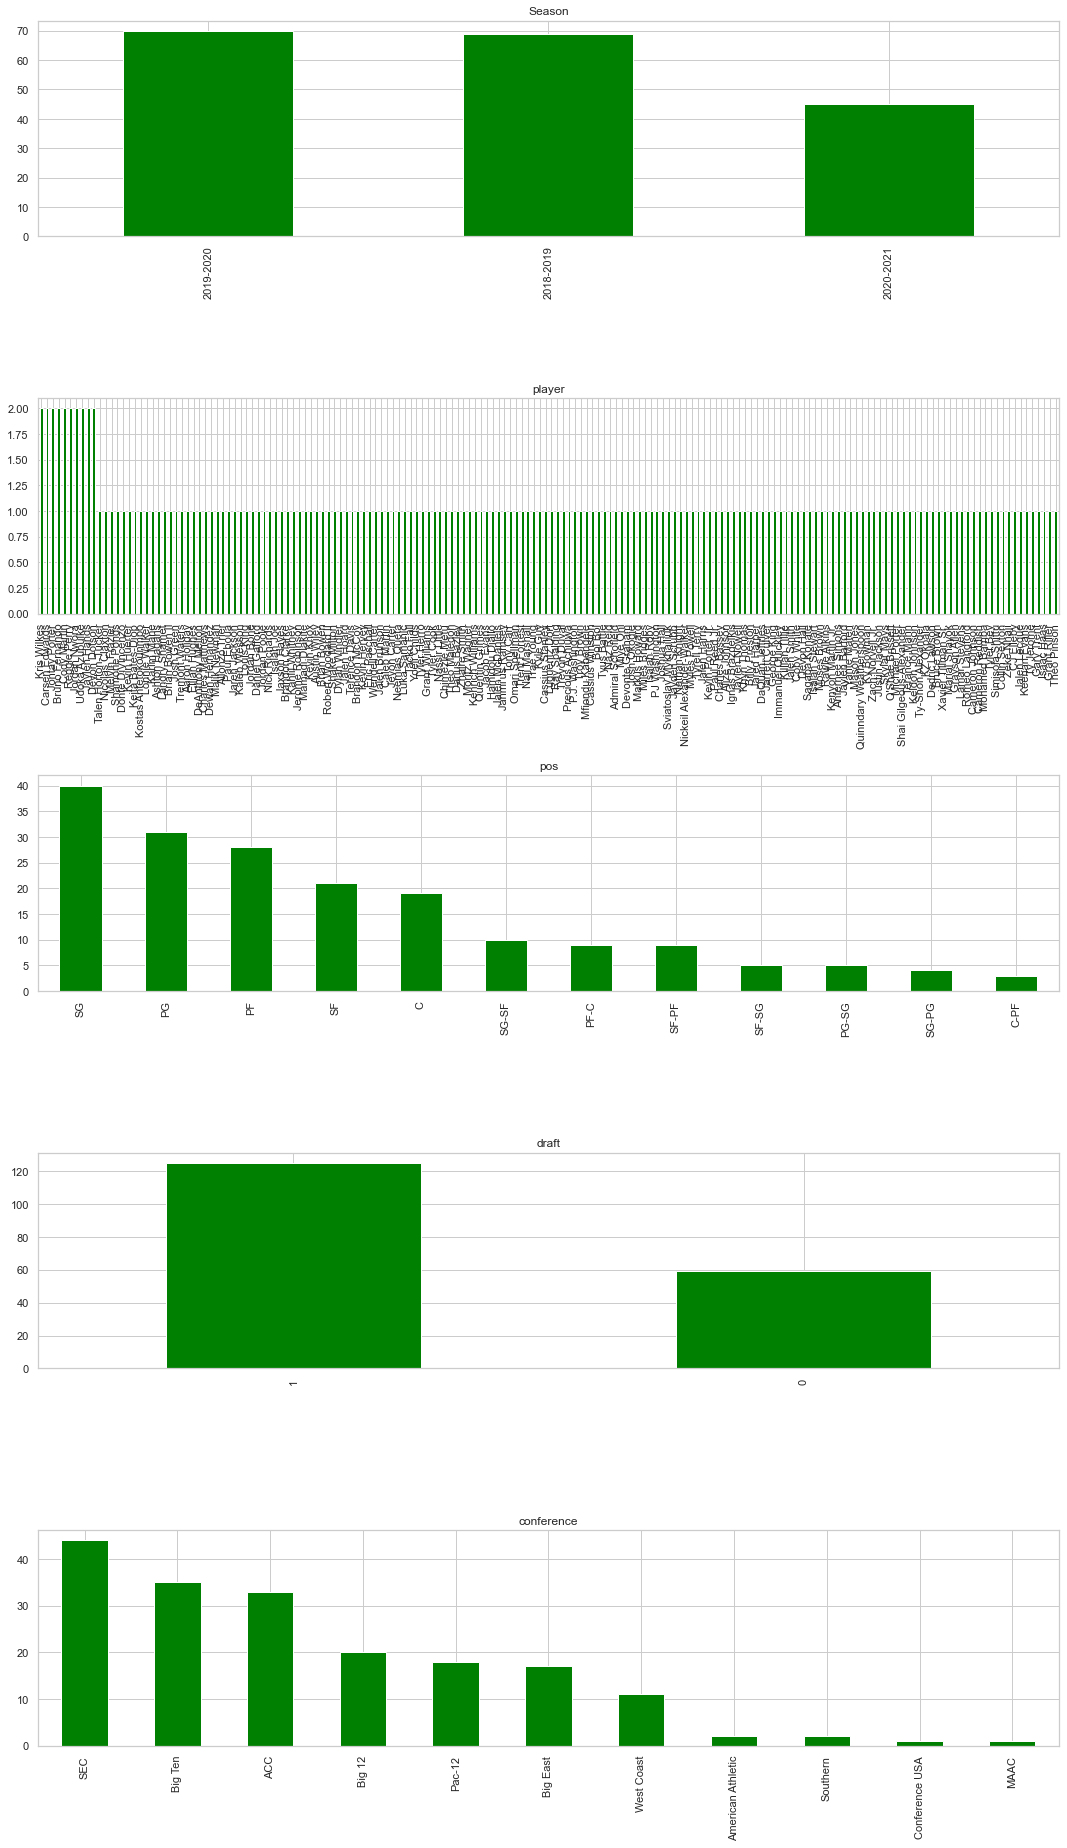

In [16]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,1,j) 
    df1821[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()


In [17]:
#Create dummy variables for categorical variables
df2 = pd.get_dummies(df1821,columns=['Season', 'pos', 'draft', 'pick', 'conference'],
drop_first=False)

#Check results
df2.head()

,player,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,...,conference_American Athletic,conference_Big 12,conference_Big East,conference_Big Ten,conference_Conference USA,conference_MAAC,conference_Pac-12,conference_SEC,conference_Southern,conference_West Coast
0,Rawle Alkins,8.90,8.50,10.00,187.96,193.04,251.46,217.4,203.20,20,...,0,0,0,0,0,0,1,0,0,0
1,Grayson Allen,5.55,8.25,10.00,190.50,193.04,246.38,198.0,200.66,22,...,0,0,0,0,0,0,0,0,0,0
2,Kostas Antetokounmpo,5.00,9.25,9.50,205.74,208.28,279.40,194.8,218.44,20,...,0,0,0,0,0,0,0,0,0,0
3,Udoka Azubuike,7.95,9.50,10.00,208.28,213.36,284.48,273.8,231.14,19,...,0,1,0,0,0,0,0,0,0,0
4,Mohamed Bamba,6.20,9.75,10.25,210.82,213.36,292.10,225.6,238.76,20,...,0,0,0,0,0,0,0,1,0,0


In [18]:
list(df2.columns)

['player',
 'body_fat',
 'hand_length',
 'hand_width',
 'height_wo_shoes',
 'height_w_shoes',
 'standing_reach',
 'weight',
 'wingspan',
 'age',
 'conference_strength',
 'points',
 'rebounds',
 'assists',
 'steals',
 'FG%',
 '3p%',
 'Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'draft_0',
 'draft_1',
 'pick_4.0',
 'pick_5.0',
 'pick_6.0',
 'pick_7.0',
 'pick_8.0',
 'pick_9.0',
 'pick_10.0',
 'pick_11.0',
 'pick_12.0',
 'pick_13.0',
 'pick_14.0',
 'pick_15.0',
 'pick_16.0',
 'pick_17.0',
 'pick_18.0',
 'pick_19.0',
 'pick_20.0',
 'pick_21.0',
 'pick_22.0',
 'pick_23.0',
 'pick_24.0',
 'pick_25.0',
 'pick_26.0',
 'pick_27.0',
 'pick_28.0',
 'pick_29.0',
 'pick_30.0',
 'pick_31.0',
 'pick_32.0',
 'pick_33.0',
 'pick_34.0',
 'pick_35.0',
 'pick_36.0',
 'pick_37.0',
 'pick_38.0',
 'pick_39.0',
 'pick_40.0',
 'pick_41.0',
 'pic

#Create lists of numerical and categorical attributes

col_cat2=['Month_Mar','Month_May','Month_June','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec', 
'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6',
'OperatingSystems_7', 'OperatingSystems_8',
'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 
'Browser_11', 'Browser_12', 'Browser_13',
'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 
'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 
'Weekend']

col_num2=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
         'ExitRates', 'PageValues', 'SpecialDay']

print("# of categorical attributes:%s" %len(col_cat2))
print("# of numerical attributes:%s" %len(col_num2))